In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('info.csv')
df.head(100)

,title,brand,rating,price,shipping,img_url
0,GIGABYTE GAMING OC GeForce RTX 4080 16GB GDDR6...,GIGABYTE,4.2,1269.99,Free Shipping,https://c1.neweggimages.com/ProductImageCompre...
1,GIGABYTE EAGLE OC GeForce RTX 4080 16GB GDDR6X...,GIGABYTE,4.2,1279.99,Free Shipping,https://c1.neweggimages.com/ProductImageCompre...
2,GIGABYTE GeForce RTX 3050 GAMING OC 8G Graphic...,GIGABYTE,4.8,299.99,Free Shipping,https://c1.neweggimages.com/ProductImageCompre...
3,MSI Mech Radeon RX 6500 XT 4GB GDDR6 PCI Expre...,MSI,4.2,183.99,Free Shipping,https://c1.neweggimages.com/ProductImageCompre...
4,SAPPHIRE Radeon RX 7900 XT 20GB GDDR6 PCI Expr...,Sapphire Tech,4.4,899.99,$9.99 Shipping,https://c1.neweggimages.com/ProductImageCompre...
...,...,...,...,...,...,...
95,SAPPHIRE PULSE AMD Radeon RX 6800 XT Gaming Gr...,Peladn,4.6,769.00,Free Shipping,https://c1.neweggimages.com/ProductImageCompre...
96,Peladn Gaming GeForce GTX 1650 4G Graphics Car...,ASUS,NaN,159.00,Free Shipping,https://c1.neweggimages.com/ProductImageCompre...
97,ASUS Phoenix NVIDIA GeForce RTX 3060 V2 Gaming...,MSI,4.5,389.99,Free Shipping,https://c1.neweggimages.com/ProductImageCompre...
98,MSI Gaming GeForce RTX 3060 12GB GDDR6 PCI Exp...,MSI,4.9,424.98,$49.99 Shipping,https://c1.neweggimages.com/ProductImageCompre...


In [3]:
df.count()

title       3600
brand       3419
rating      1552
price       3594
shipping    3598
img_url     3600
dtype: int64

In [4]:
df[df['shipping'].isnull()]

,title,brand,rating,price,shipping,img_url
320,MSI Ventus GeForce RTX 3070 8GB GDDR6 PCI Expr...,MSI,4.7,NaN,NaN,https://c1.neweggimages.com/ProductImageCompre...
1259,AX Gaming New GeForce RTX 4090 X3W 24G Video C...,NaN,4.5,NaN,NaN,https://c1.neweggimages.com/ProductImageCompre...


In [5]:
df['rating'].fillna(0, inplace=True)
df['price'].fillna(df['price'].mean(), inplace=True)
df['brand'].fillna('unknow', inplace=True)
df['shipping'].fillna('unknow', inplace=True)

## 1. The companies are providing graphics cards, the number of products of each company.

In [6]:
df.groupby('brand', as_index=False).size()

,brand,size
0,51Risc,11
1,AMD,36
2,AMD Radeon Memory,1
3,AORUS,2
4,ASPIRING,2
5,ASRock,30
6,ASRock Rack,1
7,ASUS,523
8,AX Gaming,8
9,Acer America,1


## 2. Price distribution of products

In [7]:
a = df.groupby('price', as_index=False).size()
a

,price,size
0,15.99,2
1,18.70,1
2,19.38,1
3,24.99,1
4,28.13,2
...,...,...
1517,4199.97,1
1518,4894.00,1
1519,4950.00,1
1520,5290.00,1


In [14]:
a.max()

price    8648.94
size      133.00
dtype: float64

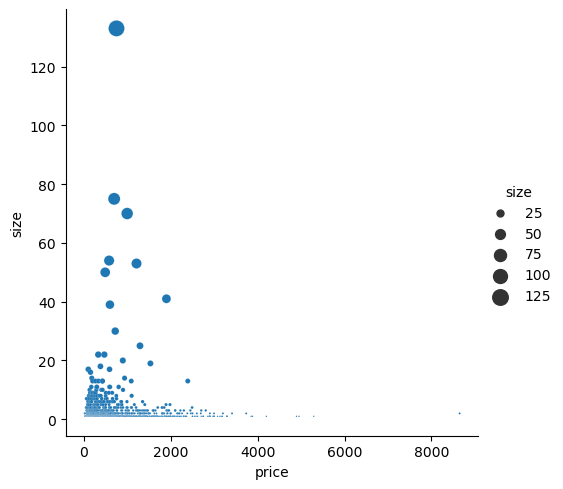

In [15]:
sns.relplot(
    data=a, x="price", y="size",
    size="size", sizes=(1, 133)
)

## 3. Product price distribution by brand

In [37]:
a = df.loc[df['brand'] == '51Risc']
# a.drop(['title', 'brand', 'rating', 'shipping', 'img_url'], axis=1)
a

,title,brand,rating,price,shipping,img_url
115,51Risc AMD Radeon RX 580 DirectX 12 RX580 8G 2...,51Risc,5.0,139.00,Free Shipping,https://c1.neweggimages.com/ProductImageCompre...
136,51Risc AMD Radeon RX550 4GB GDDR5 1183MHz 512p...,51Risc,3.5,93.63,Free Shipping,https://c1.neweggimages.com/ProductImageCompre...
139,51RISC Radeon RX6600 8GB Graphics Card GPU GDD...,51Risc,0.0,209.00,Free Shipping,https://c1.neweggimages.com/ProductImageCompre...
145,51RISC Radeon RX6600 8GB Graphics Card GPU GDD...,51Risc,0.0,209.00,Free Shipping,https://c1.neweggimages.com/ProductImageCompre...
184,51RISC New Graphics Cards RTX3060 12G Game GDD...,51Risc,0.0,399.00,Free Shipping,https://c1.neweggimages.com/ProductImageCompre...
201,51RISC GTX1660Super 6GB Gaming Video Card GTX1...,51Risc,0.0,199.00,Free Shipping,https://c1.neweggimages.com/ProductImageCompre...
980,ASUS ROG Strix Radeon RX 6900 XT 16GB GDDR6 PC...,51Risc,4.4,1274.79,$49.99 Shipping,https://c1.neweggimages.com/ProductImageCompre...
1145,MAXSUN NVIDIA GEFORCE GT 1030 2GB ITX Graphics...,51Risc,5.0,122.79,Free Shipping,https://c1.neweggimages.com/ProductImageCompre...
2182,GIGABYTE Radeon RX 5600 XT WINDFORCE OC 6G (Re...,51Risc,2.8,420.28,$49.99 Shipping,https://c1.neweggimages.com/ProductImageCompre...
2218,GIGABYTE Eagle GeForce RTX 3070 8GB GDDR6 PCI ...,51Risc,0.0,639.99,$49.99 Shipping,https://c1.neweggimages.com/ProductImageCompre...


<AxesSubplot:xlabel='brand', ylabel='price'>

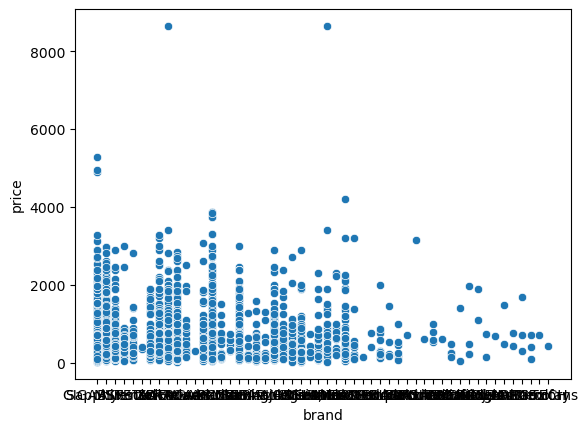

In [42]:
sns.scatterplot(data=df, x="brand", y="price")

## 4. The relationship between product price and user rating

<AxesSubplot:xlabel='rating', ylabel='price'>

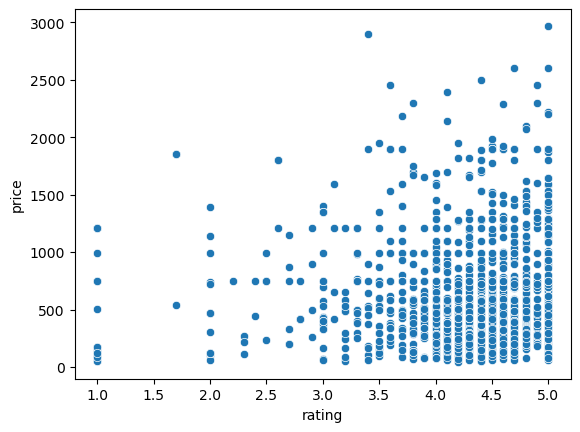

In [3]:
sns.scatterplot(data=df, x="rating", y="price")